In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=1)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

In [3]:
df = pd.read_csv("liver.csv")
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)

In [5]:
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

In [7]:
df.dropna(inplace=True, axis=1)

<Axes: >

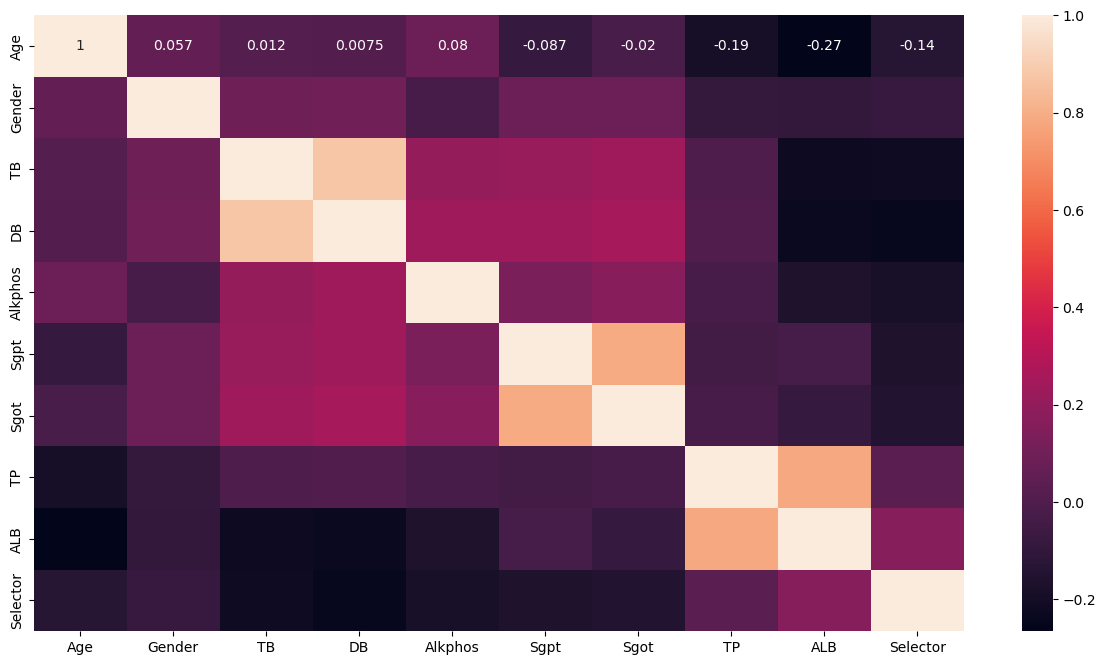

In [15]:
plt.figure(figsize=(15,8))
relations = df.corr()
sns.heatmap(relations, annot=True)

In [13]:
X, y = df.drop("Selector", axis =1), df["Selector"]
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.7521367521367521
SVC Accuracy: 0.7435897435897436
DecisionTreeClassifier Accuracy: 0.7264957264957265
RandomForestClassifier Accuracy: 0.717948717948718
KNeighborsClassifier Accuracy: 0.7264957264957265
GradientBoostingClassifier Accuracy: 0.7435897435897436
GaussianNB Accuracy: 0.5213675213675214
Epoch 1/50
47/47 [==============================] - 0s 590us/step - loss: 0.0490 - accuracy: 0.6609
Epoch 2/50
47/47 [==============================] - 0s 527us/step - loss: -1.2764 - accuracy: 0.7060
Epoch 3/50
47/47 [==============================] - 0s 541us/step - loss: -3.9109 - accuracy: 0.7060
Epoch 4/50
47/47 [==============================] - 0s 516us/step - loss: -10.8810 - accuracy: 0.7060
Epoch 5/50
47/47 [==============================] - 0s 555us/step - loss: -26.8885 - accuracy: 0.7060
Epoch 6/50
47/47 [==============================] - 0s 477us/step - loss: -56.4563 - accuracy: 0.7060
Epoch 7/50
47/47 [==============================] - 0s 559us/s

,Model,Accuracy
0,LogisticRegression,0.752137
1,SVC,0.743590
2,DecisionTreeClassifier,0.726496
3,RandomForestClassifier,0.717949
4,KNeighborsClassifier,0.726496
5,GradientBoostingClassifier,0.743590
6,GaussianNB,0.521368
7,Sequential,0.743590


In [14]:
X, y = df.drop("Selector", axis =1), df["Selector"]
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.7521367521367521
SVC Accuracy: 0.7435897435897436
DecisionTreeClassifier Accuracy: 0.7264957264957265
RandomForestClassifier Accuracy: 0.7264957264957265
KNeighborsClassifier Accuracy: 0.7008547008547008
GradientBoostingClassifier Accuracy: 0.7435897435897436
GaussianNB Accuracy: 0.5213675213675214
Epoch 1/50
47/47 [==============================] - 0s 866us/step - loss: -0.1278 - accuracy: 0.7060
Epoch 2/50
47/47 [==============================] - 0s 816us/step - loss: -1.5985 - accuracy: 0.7060
Epoch 3/50
47/47 [==============================] - 0s 1ms/step - loss: -5.2696 - accuracy: 0.7060
Epoch 4/50
47/47 [==============================] - 0s 562us/step - loss: -13.9866 - accuracy: 0.7060
Epoch 5/50
47/47 [==============================] - 0s 557us/step - loss: -31.3473 - accuracy: 0.7060
Epoch 6/50
47/47 [==============================] - 0s 2ms/step - loss: -59.8355 - accuracy: 0.7060
Epoch 7/50
47/47 [==============================] - 0s 749us/ste

,Model,Accuracy
0,LogisticRegression,0.752137
1,SVC,0.743590
2,DecisionTreeClassifier,0.726496
3,RandomForestClassifier,0.726496
4,KNeighborsClassifier,0.700855
5,GradientBoostingClassifier,0.743590
6,GaussianNB,0.521368
7,Sequential,0.743590
